In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [ ]:
#Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #hpw does it visulaizes
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
#to ensure the Gpu is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0: # Pass physical_devices to len()
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print ('GPU is used')
else:
     print ('GPU is not used')

GPU is used


In [ ]:
#Load and explore dataset
train_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [ ]:
#list all the classes
classes=os.listdir(train_dir)
num_classes=len(classes)

#display the classes name
print(f'NUmber of classes: {num_classes}')
print(f'Classes: {classes}')


NUmber of classes: 2
Classes: ['nofire', 'fire']


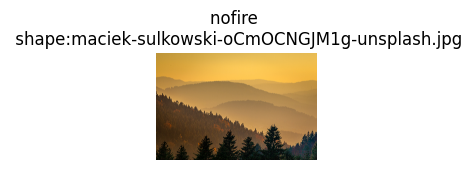

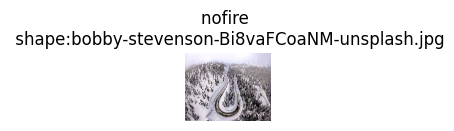

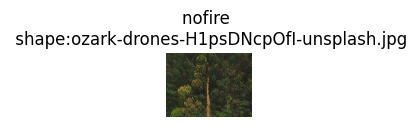

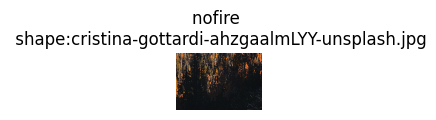

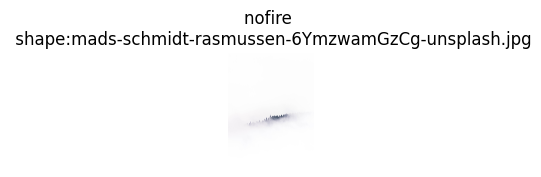

In [ ]:
#lets visualize the iamges in the dataset
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0]) #concatentate the folder and files
  image_name=os.listdir(class_path)[i]
  image_path=os.path.join(class_path,image_name)
  image=plt.imread(image_path)

  plt.subplot(1,5,i+1) #rows, columns, incremental value
  plt.imshow(image)
  plt.title(f'{classes[0]} \n shape:{image_name}')
  plt.axis('off')
  plt.show()

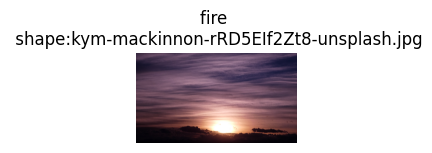

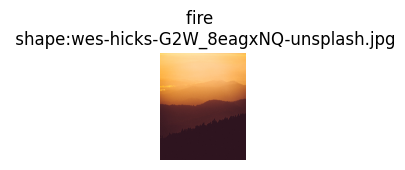

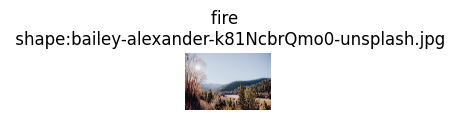

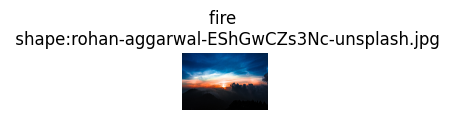

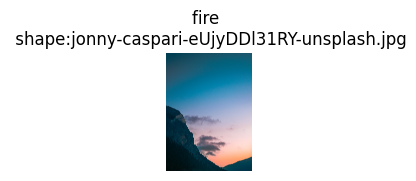

In [ ]:
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[1]) #concatentate
  image_name=os.listdir(class_path)[i]
  image_path=os.path.join(class_path,image_name)
  image=plt.imread(image_path)

  plt.subplot(1,5,i+1)
  plt.imshow(image)
  plt.title(f'{classes[0]} \n shape:{image_name}')
  plt.axis('off')
  plt.show()

In [ ]:
#preprocessing
#image dimensions and batch size
image_width, image_height= 150,150
batch_size=32 #there will be 32 images in a batch

#data generators
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)



Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [ ]:
#map the indices
class_mapping = train_generator.class_indices
#print(class_mapping)
#map the indices
class_mapping = train_generator.class_indices
#print(class_mapping)
#extract the class names
class_names=list(class_mapping.keys())
print("class name:", class_names)

class name: ['fire', 'nofire']


In [ ]:
#let's build the CNN model
model= Sequential([
    Input(shape=(image_width,image_height,3)),
    Conv2D(32,(3,3), activation='relu')
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,(3,3), activation='relu')
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128,(3,3), activation='relu')
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
]
)